# **MarePiù - an analysis of B2C market opportunities**

... introduction ... 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from scipy import stats
from statsmodels.stats import weightstats as st
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score

## **1 - Data loading and description**

For segmentation purposes, we developed a survey asking demographic data, purchasing habits and importance ratings regarding fish market. We concluded with a total of **347 respondents** and **28 questions**.

The dataset consists of 347 rows and 28 columns, each representing a specific question from the survey.

In [2]:
raw_data = pd.read_csv("C:\\Users\\melis\\Desktop\\github\\marepiu_marketinganalytics\\data_1.csv")
raw_data.head()

,Informazioni cronologiche,Qual è la tua età?,In che regione vivi?,In che zona abiti?,Con quale genere ti identifichi?,Da quanti componenti è formato il tuo nucleo familiare?,Qual è la tua professione?,Consumi prodotti ittici?,Per quale motivo non consumi prodotti ittici?,Quanto spesso consumi prodotti ittici?,...,"Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La velocità di preparazione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La semplicità di preparazione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il bilancio nutrizionale del prodotto]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La presenza di prodotti nuovi/innovativi]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Che il prodotto sia al naturale/poco lavorato]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il prezzo]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La presenza di prodotti monoporzione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [La provenienza da fonti sostenibili degli ingredienti (es. pesca certificata)]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [Il basso impatto ambientale della produzione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [Il packaging eco-sostenibile ]"
0,2024/11/24 11:38:10 AM CET,18-25 anni,Lombardia,Centro città,Uomo,4+,Studente,Si,NaN,Una volta a settimana,...,3 - Mediamente importante,2 - Poco importante,4 - Abbastanza importante,1 - Non mi interessa,2 - Poco importante,5 - Molto importante,2 - Poco importante,5 - Molto importante,4 - Abbastanza importante,4 - Abbastanza importante
1,2024/11/24 11:39:37 AM CET,18-25 anni,Lombardia,Centro città,Uomo,2-3,Lavoratore,Si,NaN,Una volta a settimana,...,4 - Abbastanza importante,4 - Abbastanza importante,3 - Mediamente importante,2 - Poco importante,4 - Abbastanza importante,4 - Abbastanza importante,4 - Abbastanza importante,5 - Molto importante,5 - Molto importante,5 - Molto importante
2,2024/11/24 11:39:51 AM CET,18-25 anni,Veneto,Centro città,Donna,1,Studente,Si,NaN,Una volta a settimana,...,3 - Mediamente importante,2 - Poco importante,5 - Molto importante,2 - Poco importante,3 - Mediamente importante,4 - Abbastanza importante,4 - Abbastanza importante,3 - Mediamente importante,3 - Mediamente importante,3 - Mediamente importante
3,2024/11/24 11:48:20 AM CET,26-35 anni,Lombardia,Periferia città,Donna,2-3,Lavoratore,Si,NaN,Una o due volte al mese,...,2 - Poco importante,3 - Mediamente importante,4 - Abbastanza importante,1 - Non mi interessa,5 - Molto importante,4 - Abbastanza importante,1 - Non mi interessa,3 - Mediamente importante,3 - Mediamente importante,3 - Mediamente importante
4,2024/11/24 11:49:38 AM CET,60-70 anni,Lombardia,Esterno (es. campagna/costiera/montagna...),Donna,1,Lavoratore,Si,NaN,Una o due volte al mese,...,5 - Molto importante,5 - Molto importante,4 - Abbastanza importante,2 - Poco importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante


The survey was structured so that there were no optional questions, but to deliver the results it was necessary to answer all questions, ensuring that the dataset had no missing values.

After asking personal questions, such as age range or region of residence, one of the first questions of the survey was, "Do you consume fish products?" If the respondent answered "NO," they were directed to the final part of the survey, which asked about motivations and opportunities.  

In [3]:
data_no = raw_data[raw_data['Consumi prodotti ittici?']=='No']
len(data_no)

39

In [4]:
no_fish = len(data_no)/len(raw_data)*100
print(f"Percentage of people who don't eat fish (according to our data) is {no_fish:.2f}%")

Percentage of people who don't eat fish (according to our data) is 11.24%


While we are aware that our sample is not perfectly representative of the entire population, assuming it were, we can conclude that approximately one-tenth of the population can be excluded a priori as potential customers of our company, as they do not consume fish products regardless of other factors such as price or freshness.

To complete this analysis and confirm the assumption, we tried to understand the reasons why these individuals do not consume fish products, in order to have as complete an idea as possible of the sample under analysis.

In [5]:
response_distribution = raw_data['Per quale motivo non consumi prodotti ittici?'].value_counts()
response_distribution

Per quale motivo non consumi prodotti ittici?
Questione di gusti                                20
Sono vegetariano/vegano                            7
Hanno un prezzo troppo alto                        3
Questione di gusti;Hanno un prezzo troppo alto     2
Abitudine                                          1
Non so cosa sono i prodotti ittici                 1
Non ci penso non ci faccio caso                    1
Sono vegetariano/vegano;Questione di gusti         1
Sono allergica                                     1
Questione di gusti;                                1
Non mi piacciono                                   1
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------------

After this brief preliminary analysis, for the segmentation analysis, we filtered the data to include only respondents who consume seafood products.

In [6]:
data = raw_data[raw_data['Consumi prodotti ittici?']=='Si']
data.head()

,Informazioni cronologiche,Qual è la tua età?,In che regione vivi?,In che zona abiti?,Con quale genere ti identifichi?,Da quanti componenti è formato il tuo nucleo familiare?,Qual è la tua professione?,Consumi prodotti ittici?,Per quale motivo non consumi prodotti ittici?,Quanto spesso consumi prodotti ittici?,...,"Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La velocità di preparazione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La semplicità di preparazione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il bilancio nutrizionale del prodotto]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La presenza di prodotti nuovi/innovativi]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Che il prodotto sia al naturale/poco lavorato]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il prezzo]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La presenza di prodotti monoporzione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [La provenienza da fonti sostenibili degli ingredienti (es. pesca certificata)]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [Il basso impatto ambientale della produzione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [Il packaging eco-sostenibile ]"
0,2024/11/24 11:38:10 AM CET,18-25 anni,Lombardia,Centro città,Uomo,4+,Studente,Si,NaN,Una volta a settimana,...,3 - Mediamente importante,2 - Poco importante,4 - Abbastanza importante,1 - Non mi interessa,2 - Poco importante,5 - Molto importante,2 - Poco importante,5 - Molto importante,4 - Abbastanza importante,4 - Abbastanza importante
1,2024/11/24 11:39:37 AM CET,18-25 anni,Lombardia,Centro città,Uomo,2-3,Lavoratore,Si,NaN,Una volta a settimana,...,4 - Abbastanza importante,4 - Abbastanza importante,3 - Mediamente importante,2 - Poco importante,4 - Abbastanza importante,4 - Abbastanza importante,4 - Abbastanza importante,5 - Molto importante,5 - Molto importante,5 - Molto importante
2,2024/11/24 11:39:51 AM CET,18-25 anni,Veneto,Centro città,Donna,1,Studente,Si,NaN,Una volta a settimana,...,3 - Mediamente importante,2 - Poco importante,5 - Molto importante,2 - Poco importante,3 - Mediamente importante,4 - Abbastanza importante,4 - Abbastanza importante,3 - Mediamente importante,3 - Mediamente importante,3 - Mediamente importante
3,2024/11/24 11:48:20 AM CET,26-35 anni,Lombardia,Periferia città,Donna,2-3,Lavoratore,Si,NaN,Una o due volte al mese,...,2 - Poco importante,3 - Mediamente importante,4 - Abbastanza importante,1 - Non mi interessa,5 - Molto importante,4 - Abbastanza importante,1 - Non mi interessa,3 - Mediamente importante,3 - Mediamente importante,3 - Mediamente importante
4,2024/11/24 11:49:38 AM CET,60-70 anni,Lombardia,Esterno (es. campagna/costiera/montagna...),Donna,1,Lavoratore,Si,NaN,Una o due volte al mese,...,5 - Molto importante,5 - Molto importante,4 - Abbastanza importante,2 - Poco importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante


In [7]:
print(f"Number of people who eat fish products: {len(data)}")
print(f"Percentage: {len(data)/len(raw_data)*100:.2f}%")

Number of people who eat fish products: 308
Percentage: 88.76%


308 people eat fish, which is almost 90% of our sample. Of these, we want to understand their needs and habits in order to identify similar behaviors within groups of the population.

To conclude data pre-processing, we set an **index column** corresponding to ID of respondent.

In [8]:
# Set the 'respondent_id' column as the index
data['respondent_id'] = data.index
data = data.set_index('respondent_id')

C:\Users\melis\AppData\Local\Temp\ipykernel_15452\3699331926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['respondent_id'] = data.index


## **2 - Segmentation**

### **2.1. Data**
The dataframe "_segmentation_data_" consists of a selection of columns (17 to 28) from the original dataset. They contain the importance ratings assigned from each respondent to various product characteristics. The attributes we decided to take into account are the following:
- **freshness**: importance of the freshness of the purchased product.
- **origin**: importance of the origin of the raw materials.
- **cooking_speed**: importance of the speed of preparation.
- **cooking_simplicity**: importance of the simplicity of preparation.
- **nutritional_balance**: importance of the nutritional balance of the product.
- **innovative_products**: importance of the presence of new/innovative products.
- **unprocessed**: importance of the product being natural/minimally processed.
- **price**: importance of the price.
- **single_portion**: importance of the availability of single-portion products.
- **sustainable_sources**: importance of the ingredients coming from sustainable sources (e.g., certified fishing).
- **low_impact_environment**: importance of low environmental impact in production.
- **sustainable_packaging**: importance of eco-friendly packaging.

The responses range from 1 to 5, where 1 represents "Not interested" and 5 represents "Very important".

In [9]:
segmentation_data = data.iloc[:, 16:28]
segmentation_data

,"Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La freschezza del prodotto acquistato]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La provenienza della materia prima]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La velocità di preparazione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La semplicità di preparazione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il bilancio nutrizionale del prodotto]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La presenza di prodotti nuovi/innovativi]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Che il prodotto sia al naturale/poco lavorato]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il prezzo]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La presenza di prodotti monoporzione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [La provenienza da fonti sostenibili degli ingredienti (es. pesca certificata)]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [Il basso impatto ambientale della produzione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [Il packaging eco-sostenibile ]"
respondent_id,,,,,,,,,,,,
0,4 - Abbastanza importante,3 - Mediamente importante,3 - Mediamente importante,2 - Poco importante,4 - Abbastanza importante,1 - Non mi interessa,2 - Poco importante,5 - Molto importante,2 - Poco importante,5 - Molto importante,4 - Abbastanza importante,4 - Abbastanza importante
1,5 - Molto importante,3 - Mediamente importante,4 - Abbastanza importante,4 - Abbastanza importante,3 - Mediamente importante,2 - Poco importante,4 - Abbastanza importante,4 - Abbastanza importante,4 - Abbastanza importante,5 - Molto importante,5 - Molto importante,5 - Molto importante
2,5 - Molto importante,4 - Abbastanza importante,3 - Mediamente importante,2 - Poco importante,5 - Molto importante,2 - Poco importante,3 - Mediamente importante,4 - Abbastanza importante,4 - Abbastanza importante,3 - Mediamente importante,3 - Mediamente importante,3 - Mediamente importante
3,5 - Molto importante,3 - Mediamente importante,2 - Poco importante,3 - Mediamente importante,4 - Abbastanza importante,1 - Non mi interessa,5 - Molto importante,4 - Abbastanza importante,1 - Non mi interessa,3 - Mediamente importante,3 - Mediamente importante,3 - Mediamente importante
4,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,4 - Abbastanza importante,2 - Poco importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante
...,...,...,...,...,...,...,...,...,...,...,...,...
341,5 - Molto importante,5 - Molto importante,3 - Mediamente importante,3 - Mediamente importante,5 - Molto importante,5 - Molto importante,4 - Abbastanza importante,5 - Molto importante,4 - Abbastanza importante,4 - Abbastanza importante,4 - Abbastanza importante,5 - Molto importante
342,4 - Abbastanza importante,3 - Mediamente importante,1 - Non mi interessa,1 - Non mi interessa,1 - Non mi interessa,2 - Poco importante,4 - Abbastanza importante,5 - Molto importante,3 - Mediamente importante,4 - Abbastanza importante,4 - Abbastanza importante,4 - Abbastanza importante
343,1 - Non mi interessa,1 - Non mi interessa,5 - Molto importante,5 - Molto importante,1 - Non mi interessa,1 - Non mi interessa,1 - Non mi interessa,5 - Molto importante,5 - Molto importante,1 - Non mi interessa,1 - Non mi interessa,1 - Non mi interessa


- We renamed columns with pre-specified and easier **column names** and mapped cell values to integers.

In [10]:
# rename columns
new_names = { 'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La freschezza del prodotto acquistato]' : 'freshness',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La provenienza della materia prima]': 'origin',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La velocità di preparazione]' : 'cooking_speed',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La semplicità di preparazione]' : 'cooking_simplicity',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il bilancio nutrizionale del prodotto]' : 'nutritional_balance',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La presenza di prodotti nuovi/innovativi]': 'innovative_products',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Che il prodotto sia al naturale/poco lavorato]' : 'unprocessed',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il prezzo]' : 'price',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La presenza di prodotti monoporzione]' : 'single_portion',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [La provenienza da fonti sostenibili degli ingredienti (es. pesca certificata)]' : 'sustainable_sources',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [Il basso impatto ambientale della produzione]' : 'low_impact_environment',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [Il packaging eco-sostenibile ]' : 'sustainable_packaging'}

segmentation_data = segmentation_data.rename(columns=new_names)

# map textual responses to numerical values
response_mapping = {
    '1 - Non mi interessa': 1,
    '2 - Poco importante': 2,
    '3 - Mediamente importante': 3,
    '4 - Abbastanza importante': 4,
    '5 - Molto importante': 5
}

for column in segmentation_data.columns:
    segmentation_data[column] = segmentation_data[column].map(response_mapping)

segmentation_data.head()

,freshness,origin,cooking_speed,cooking_simplicity,nutritional_balance,innovative_products,unprocessed,price,single_portion,sustainable_sources,low_impact_environment,sustainable_packaging
respondent_id,,,,,,,,,,,,
0,4,3,3,2,4,1,2,5,2,5,4,4
1,5,3,4,4,3,2,4,4,4,5,5,5
2,5,4,3,2,5,2,3,4,4,3,3,3
3,5,3,2,3,4,1,5,4,1,3,3,3
4,5,5,5,5,4,2,5,5,5,5,5,5


- Check **null values**:

In [11]:
segmentation_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 0 to 345
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   freshness               308 non-null    int64
 1   origin                  308 non-null    int64
 2   cooking_speed           308 non-null    int64
 3   cooking_simplicity      308 non-null    int64
 4   nutritional_balance     308 non-null    int64
 5   innovative_products     308 non-null    int64
 6   unprocessed             308 non-null    int64
 7   price                   308 non-null    int64
 8   single_portion          308 non-null    int64
 9   sustainable_sources     308 non-null    int64
 10  low_impact_environment  308 non-null    int64
 11  sustainable_packaging   308 non-null    int64
dtypes: int64(12)
memory usage: 31.3 KB


- We computed some **metrics** of each attribute ...

In [12]:
segmentation_data.describe().style.format("{:.1f}")

,freshness,origin,cooking_speed,cooking_simplicity,nutritional_balance,innovative_products,unprocessed,price,single_portion,sustainable_sources,low_impact_environment,sustainable_packaging
count,308.0,308.0,308.0,308.0,308.0,308.0,308.0,308.0,308.0,308.0,308.0,308.0
mean,4.3,3.9,3.3,3.4,3.7,2.6,3.9,3.9,2.8,3.8,3.8,3.6
std,1.0,1.1,1.1,1.1,1.2,1.2,1.1,1.0,1.3,1.1,1.2,1.2
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,4.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0
50%,5.0,4.0,3.0,3.5,4.0,2.5,4.0,4.0,3.0,4.0,4.0,4.0
75%,5.0,5.0,4.0,4.0,5.0,3.0,5.0,5.0,4.0,5.0,5.0,5.0
max,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


... and **plotted** distribution to understand.

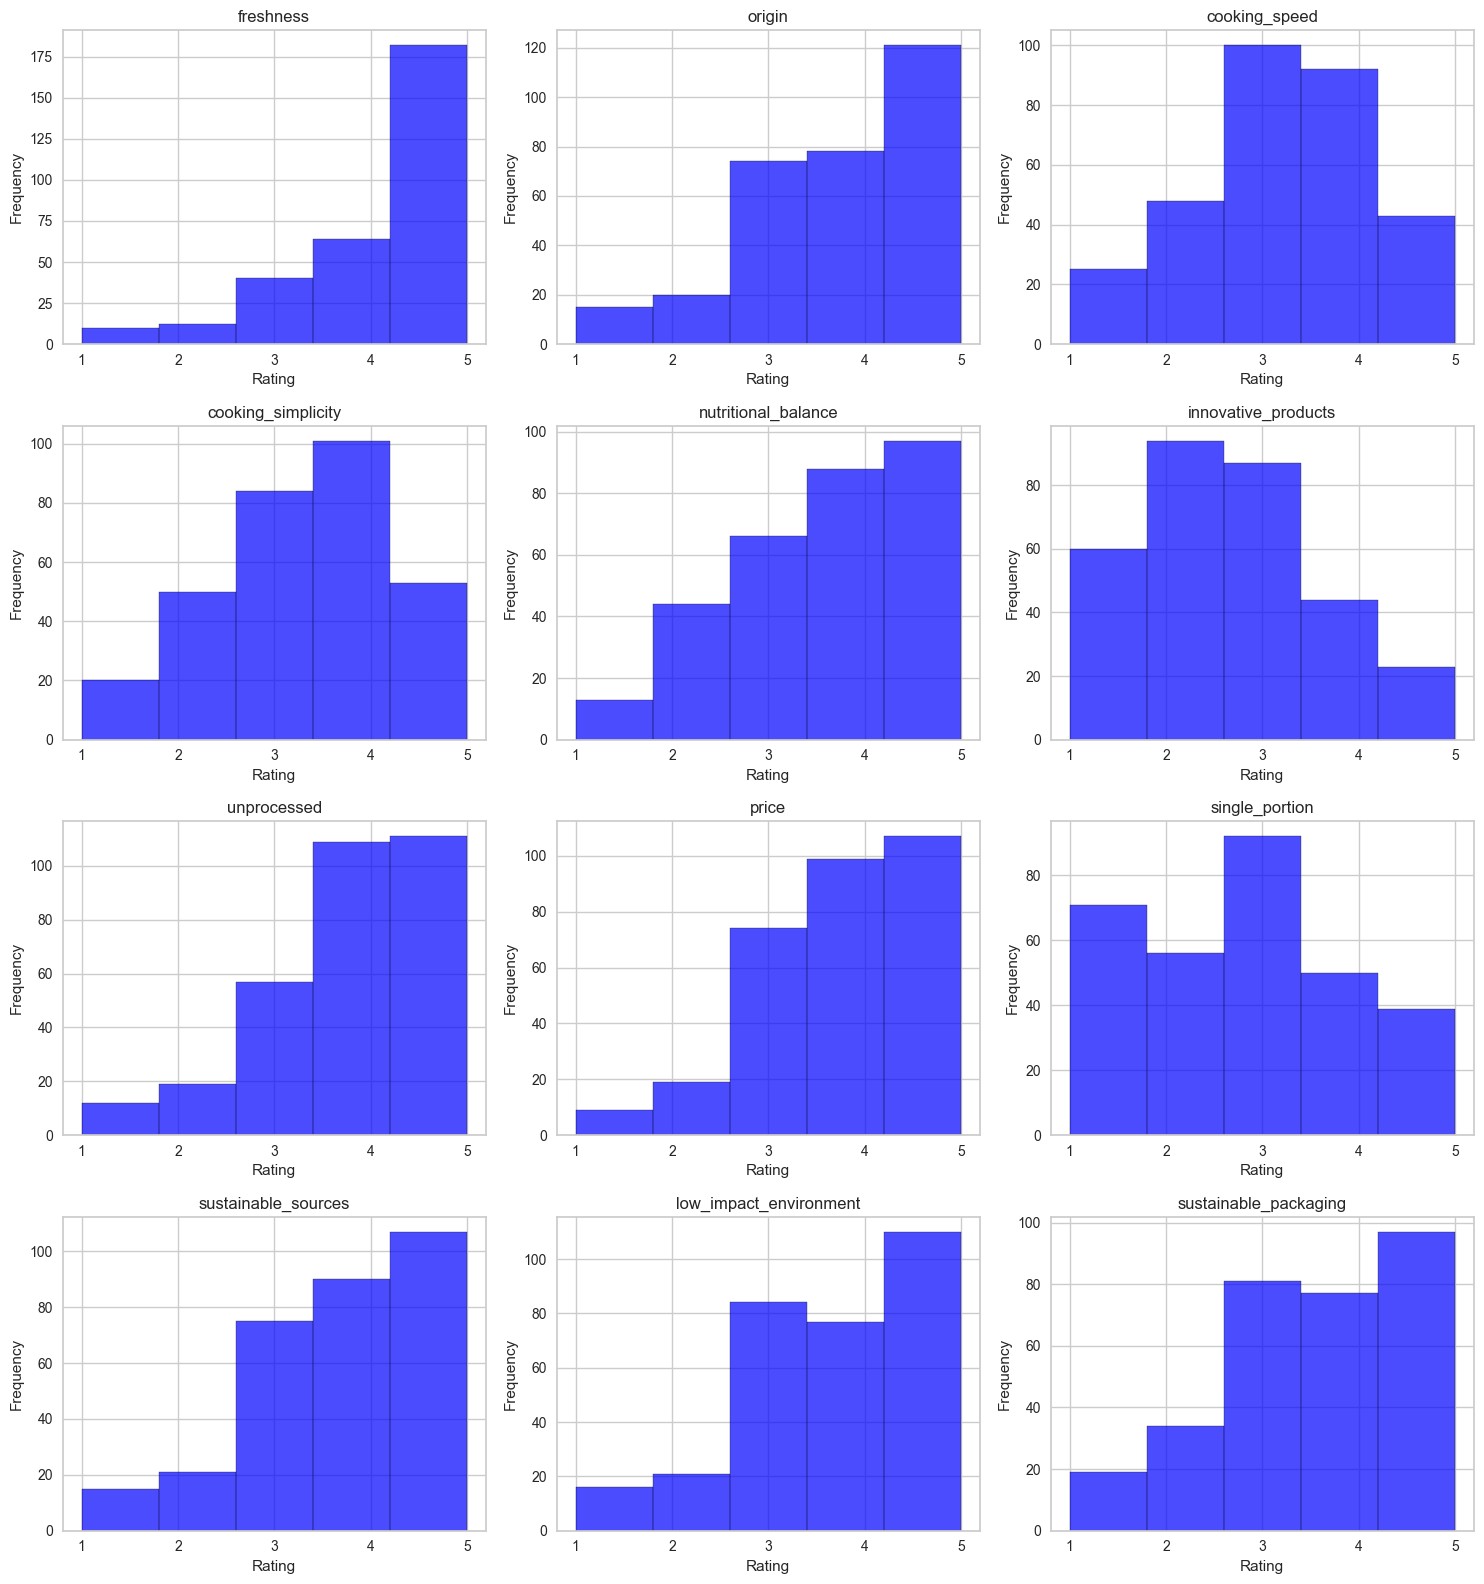

In [13]:
num_variables = len(segmentation_data.columns) 
num_rows = num_variables // 3 + (num_variables % 3 > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows * 4), tight_layout=True)
axes = axes.flatten()

for index, column in enumerate(segmentation_data.columns):
    axes[index].hist(segmentation_data[column], bins=5, range=(1, 5), alpha=0.7, color='blue', edgecolor='black')
    axes[index].set_title(column)
    axes[index].set_xlabel('Rating')
    axes[index].set_ylabel('Frequency')
    axes[index].set_xticks(range(1, 6))

for i in range(index + 1, len(axes)):
    axes[i].axis('off')

plt.show()

The distributions reveal insights into the respondents' perceptions and preferences across different attributes. Overall, many attributes are skewed towards higher ratings (4 and 5), indicating that most respondents seem to have positive views on the various characteristics. However, there are some notable exceptions where responses are more balanced or spread across lower ratings, reflecting some areas where satisfaction may vary more.

- **Freshness:** Strong preference for high freshness, with the majority of respondents rating it 4 or 5 (246 total responses), suggesting that freshness is a crucial factor for seafood consumers.
- **Origin:** Similar to freshness, a significant portion of the respondents rated the origin of seafood positively (4 and 5), but there are more people rating it lower (1 and 2).
- **Cooking Speed:** Responses are more spread across the rating scale, with the highest concentration in the mid-range.
- **Cooking Simplicity:** The distribution is more positively skewed with a high number of respondents rating simplicity at 4 and 5.
- **Nutritional Balance:** Many respondents rating it 4 or 5.
- **Innovative Products:** The distribution is more spread out, with the highest frequencies at 2 and 3, indicating a moderate interest in innovative products. This may indicate that while innovation in seafood products is appreciated, it might not be a top priority for most respondents. This should be considerate if a company want to sell a new product, which may be less 'traditional'.
- **Unprocessed:** There is a strong preference for unprocessed seafood, with a high concentration of ratings at 4 and 5.
- **Price:** Similar to cooking speed, responses for price are more balanced across the scale.
- **Single Portion:** The distribution is skewed towards 1 and 3. The demand for single-portion seafood products seems to vary, with some respondents being indifferent.
- **Sustainable Sources:** Many respondents rate sustainable sourcing highly (4 and 5), with the majority seeming to prioritize sustainability.
- **Low Impact on the Environment:**Similar to sustainable sourcing, most respondents rated low environmental impact positively (4 and 5), reflecting strong concern for environmental factors.
- **Sustainable Packaging:** The majority of responses are positive, with most ratings clustered around 3 to 5, showing concern for sustainability in packaging.

C:\Users\melis\AppData\Local\Temp\ipykernel_15452\2702590516.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Variable', y='Value', data=df_melted, palette='Set2')


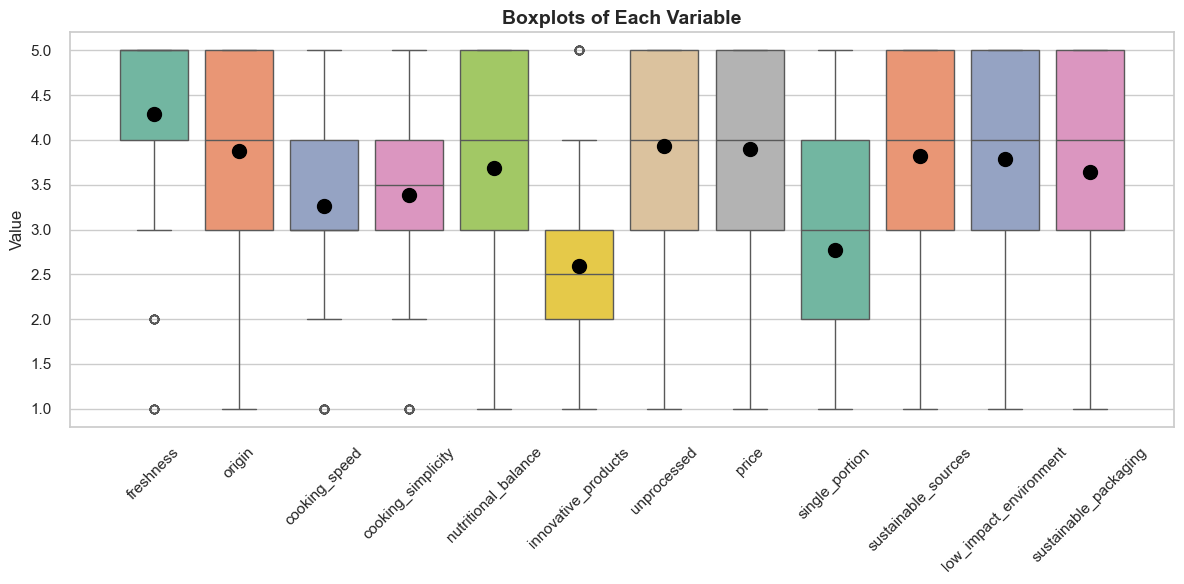

In [14]:
sns.set(style="whitegrid")

df_melted = segmentation_data.melt(var_name='Variable', value_name='Value')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Variable', y='Value', data=df_melted, palette='Set2')
means = segmentation_data.mean()
for i, mean in enumerate(means):
    plt.scatter(i, mean, color='black', label='Mean' if i == 0 else "", s=100, zorder=10)
plt.title('Boxplots of Each Variable', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The boxplots provide a clear picture of how respondents perceive different attributes related to seafood products. 
Attributes like freshness and origin stand out with consistently high ratings, indicating they are critical factors for most consumers, as reflected by their tight distributions around 4 and 5. Sustainability-related aspects also show strong preferences, highlighting the importance of environmental consciousness. 
On the other hand, attributes such as cooking speed and simplicity exhibit wider variability, suggesting more diverse views on their significance.
Notably, innovative products receive the lowest overall ratings, indicating limited consumer enthusiasm for innovation in seafood. 
Overall, the data suggest a strong focus on traditional and sustainable qualities, with less emphasis on innovation or convenience for certain respondents.

- Last, we checked for **correlation** between attributes:

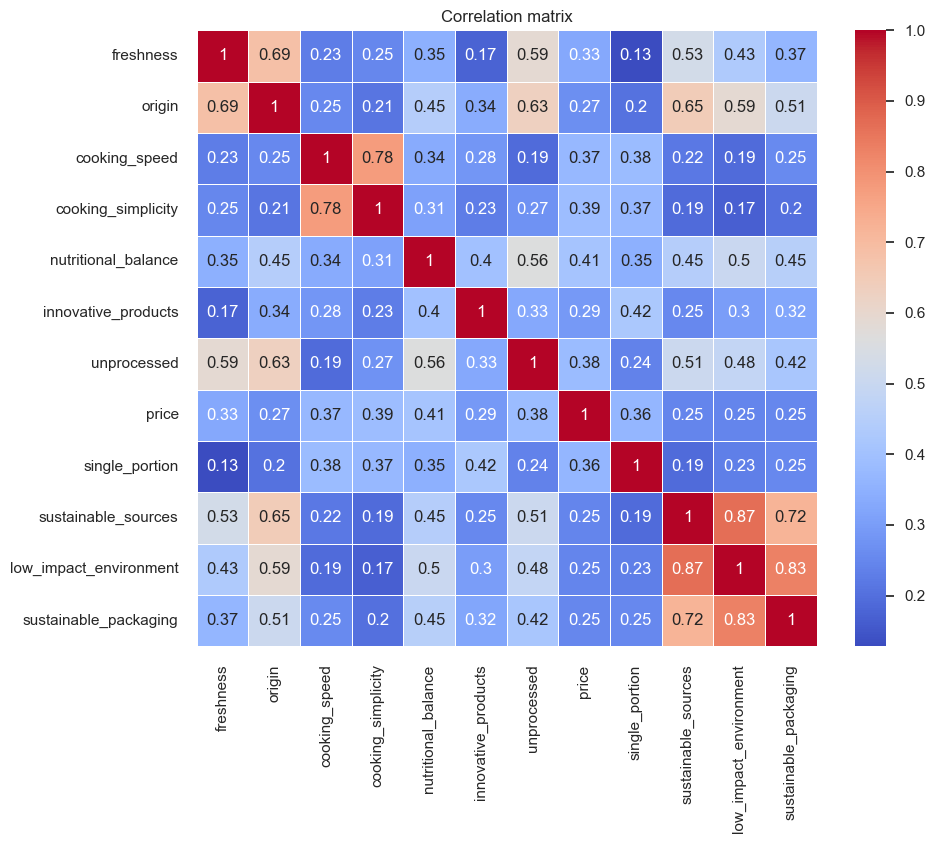

In [15]:
corr_matrix = segmentation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

-  Even though 'freshness' and 'origin' appear to be correlated (0.69), we decided to keep them both because they have significantly different implications in our decision and labour process
- 'Cooking_speed' and 'cooking_simplicity' have a high correlation (0.78) . Our respondents may have given the same meaning to the variables, therefor we computed the mean and created a new variable column named 'speed_n_simplicity'. 
- In the matrix the last three variables about sustainability are highly correlated. We first drop 'low_impact_environment' and keep 'sustainable_sources' because of their similar implications. 'sustainable_packaging' is also correlated with both variables, but we kept it due to the relevance given nowadays to this factor.  

In [16]:
segmentation_data['speed_n_simplicity'] = segmentation_data[['cooking_speed', 'cooking_simplicity']].mean(axis=1)
segmentation_data.drop(['cooking_speed', 'cooking_simplicity', 'low_impact_environment'], axis=1, inplace=True)  

In [17]:
final_segmentation_data= segmentation_data
final_segmentation_data.head()

,freshness,origin,nutritional_balance,innovative_products,unprocessed,price,single_portion,sustainable_sources,sustainable_packaging,speed_n_simplicity
respondent_id,,,,,,,,,,
0,4,3,4,1,2,5,2,5,4,2.5
1,5,3,3,2,4,4,4,5,5,4.0
2,5,4,5,2,3,4,4,3,3,2.5
3,5,3,4,1,5,4,1,3,3,2.5
4,5,5,4,2,5,5,5,5,5,5.0


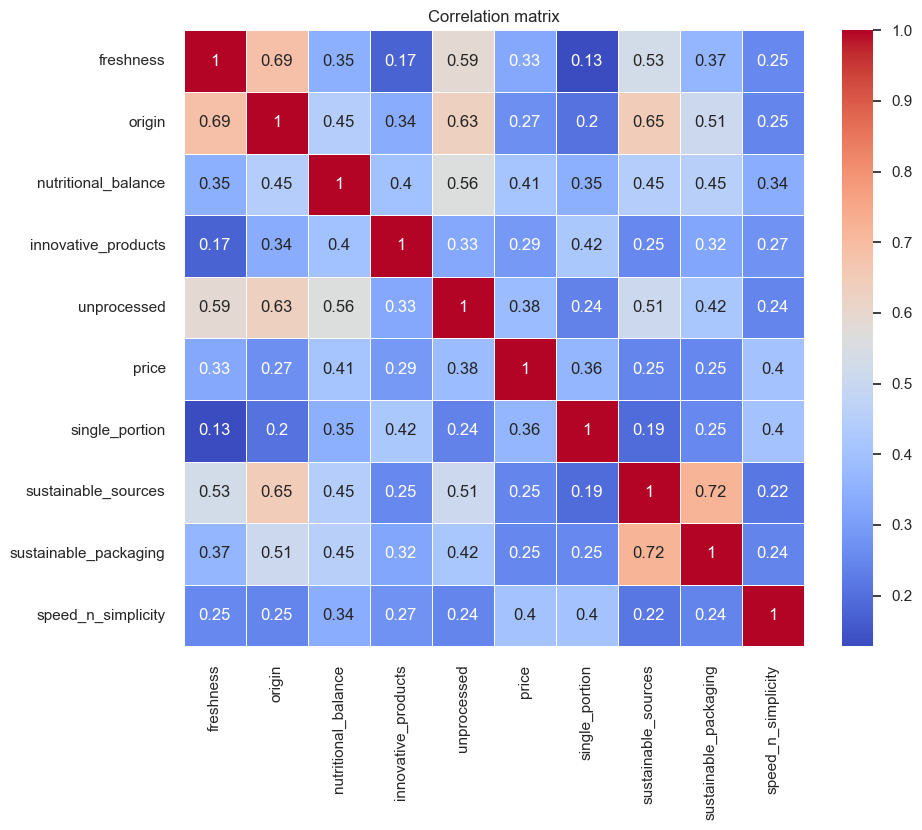

In [18]:
corr_matrix = final_segmentation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

After correlation adjustment there's a visible improvement in the heatmap. 
We can identify subgroups of variables with a medium correlation, which will be useful in the achievement of our marketing goals (e.g. 'sustainable_sources', 'origin', 'freshness', 'unprocessed').  

**PROVO A FARE VIF**

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creazione di un DataFrame per i valori VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = segmentation_data.columns
vif_data["VIF"] = [variance_inflation_factor(segmentation_data.values, i) for i in range(segmentation_data.shape[1])]

# Visualizzazione dei risultati ordinati per VIF
print(vif_data.sort_values(by="VIF", ascending=False))

                Variable        VIF
0              freshness  36.142702
7    sustainable_sources  34.601963
1                 origin  34.235709
4            unprocessed  31.784274
8  sustainable_packaging  22.729136
5                  price  20.151058
2    nutritional_balance  19.681693
9     speed_n_simplicity  14.018909
3    innovative_products   8.457704
6         single_portion   7.885157


**QUESTO EVIDENZIA PROBLEMI, VOGLIAMO FARE QUALCOSA O CE NE FREGHIAMO????**

### **2.2. PCA**

From the results of the Variance Inflation Factor (VIF), it emerged that some variables show strong multicollinearity (VIFs greater than 10), suggesting that many of them could be redundant. To reduce the effect of multicollinearity and improve the interpretation of the data, it is useful to consider applying a Principal Component Analysis (PCA), which allows for reducing the dimensionality of the dataset while retaining the most relevant information.

Before proceeding with the PCA, we calculated the Kaiser-Meyer-Olkin (KMO), which is a measure of the sample's adequacy for factor analysis. 

In [20]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(segmentation_data)
print(f"KMO Value: {kmo_model}")

KMO Value: 0.8457551794181937


A KMO value of 0.846 indicates that the data are suitable for PCA, supporting the decision to proceed with this technique for variable reduction.

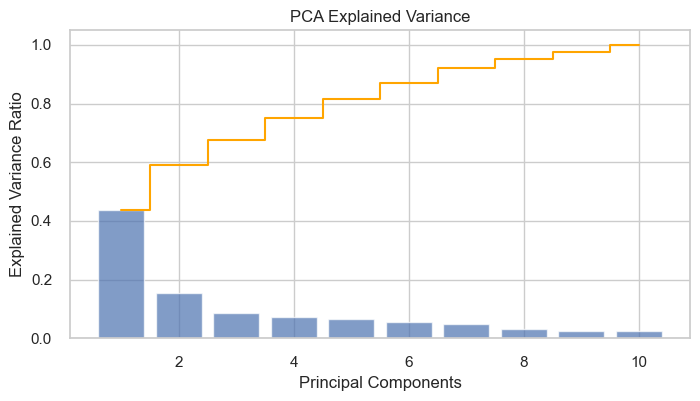

        PC1       PC2       PC3
0 -0.982740 -0.804189  0.389915
1  0.933870  0.190883  0.673907
2 -0.083061  0.783686 -0.481721
3 -1.295717 -1.576117 -1.654792
4  3.136531  0.706651 -0.431377


In [21]:
# PCA
pca_full = PCA(n_components=len(segmentation_data.columns))
principal_components_full = pca_full.fit_transform(segmentation_data)
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7)
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', color='orange')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('PCA Explained Variance')
plt.show()

# PCA with fewer components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(segmentation_data)
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3'])


print(pca_df.head())


Checking the graph, explained variance is low with few components. Having at least 90% of explained variance requires:

In [22]:
components_for_90 = np.argmax(cumulative_variance >= 0.9) + 1  # +1 perché gli indici partono da 0

print("Number of components to have 90% of variance explained:", components_for_90, "out of 10 variables")

Number of components to have 90% of variance explained: 7 out of 10 variables


For the purposes of this project, we aim at maintaining a high level of interpretability. Clustering on the original data will allow us to group individuals based on their actual characteristics, making the resulting clusters more intuitive and directly actionable. This approach is especially useful since we plan to use the results for targeted strategies or business decisions, as the clusters will be based on the real, interpretable features rather than abstract components from PCA.

Let's proceed and apply some clustering techniques on original data.

### **2.3. Clustering**

#### **2.3.1. Optimal number of clusters**.

We started with K- Means approach. At first, we computed **optimal number of clusters** with Elbow Method and Silhouette Score.

- **Elbow Method**:

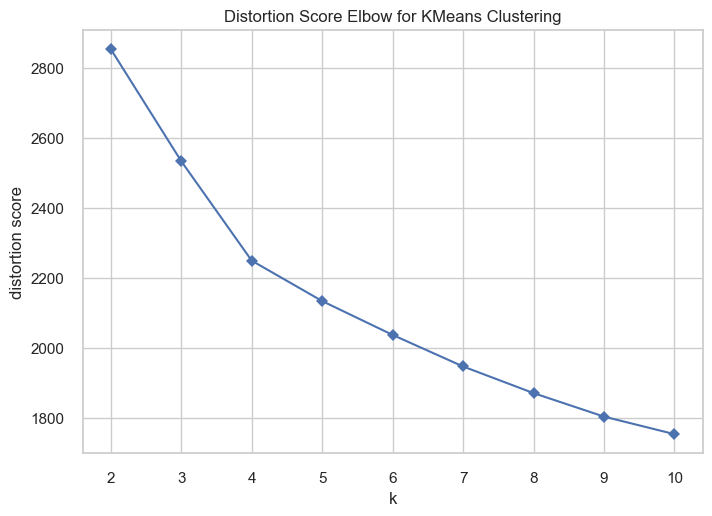

In [23]:
model = KMeans()
visualizer = KElbowVisualizer(model,timings=False, locate_elbow= False)
visualizer.fit(segmentation_data)
visualizer.show();

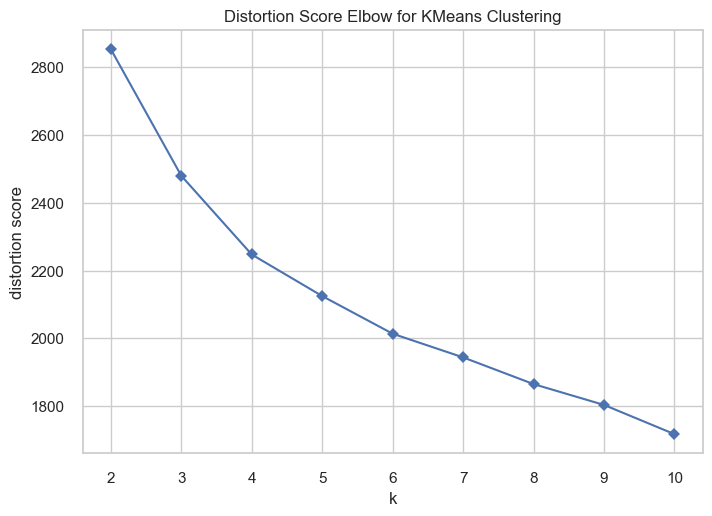

In [24]:
visualizer = KElbowVisualizer(model,timings=False, locate_elbow= False)
visualizer.fit(segmentation_data)
visualizer.show();

**IL PROF HA SUGGERITO DI RIPROVARE A FARLO, MA NON SO COME METTERLO GIU**

- **Silhouette Method**

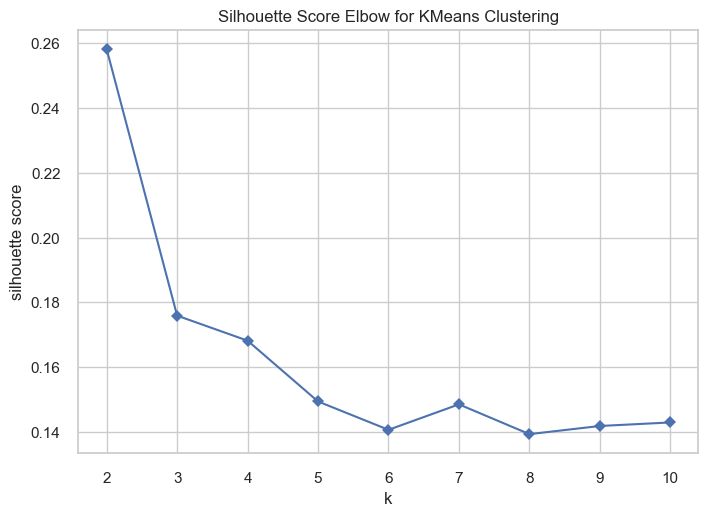

In [25]:
visualizer = KElbowVisualizer(model,metric='silhouette',timings=False, locate_elbow= False)
visualizer.fit(segmentation_data)
visualizer.show();

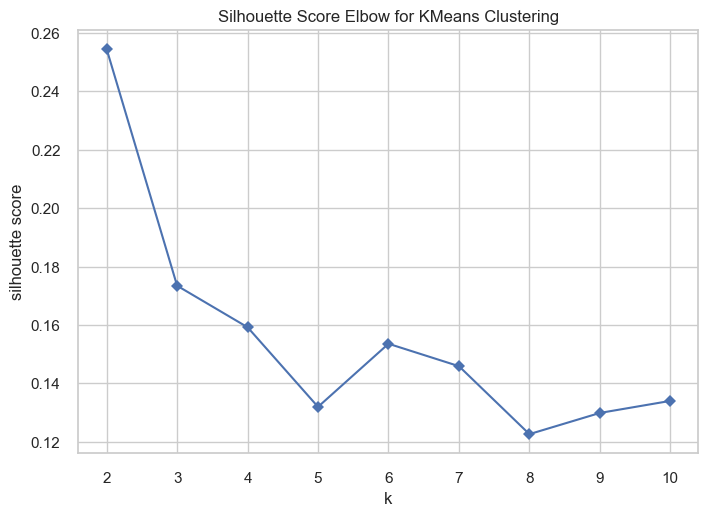

In [26]:
visualizer = KElbowVisualizer(model,metric='silhouette',timings=False, locate_elbow= False)
visualizer.fit(segmentation_data)
visualizer.show();

Non c'è un risultato chiaro da questi grafici, infatti riprovando otteniamo addirittura risultati diversi 

Next, we performed clustering with K=4: (cercare di dare spiegazione oppure possiamo fare sia 4 che 3 e poi vedere i risultati che dicono?)

#### **2.3.2. K-Means**

Considering that we were unable to clearly determine the number of clusters using the previous methods, we believe that 4 could be a good balance. Fewer clusters might not allow us to capture important key characteristics of the groups. We aimed for a balance, taking into account the number of variables and statistical units available.

In [27]:
kmeans4 = KMeans(n_clusters = 4, random_state=42)
kmeans4.fit(segmentation_data)
segmentation_data['Cluster_KMeans'] = kmeans4.labels_ +1

segmentation_data

,freshness,origin,nutritional_balance,innovative_products,unprocessed,price,single_portion,sustainable_sources,sustainable_packaging,speed_n_simplicity,Cluster_KMeans
respondent_id,,,,,,,,,,,
0,4,3,4,1,2,5,2,5,4,2.5,4
1,5,3,3,2,4,4,4,5,5,4.0,4
2,5,4,5,2,3,4,4,3,3,2.5,1
3,5,3,4,1,5,4,1,3,3,2.5,4
4,5,5,4,2,5,5,5,5,5,5.0,3
...,...,...,...,...,...,...,...,...,...,...,...
341,5,5,5,5,4,5,4,4,5,3.0,3
342,4,3,1,2,4,5,3,4,4,1.0,1
343,1,1,1,1,1,5,5,1,1,5.0,2


To verify that our choice is the best, we will create a silhouette plot to check if there are any misclassified units.

In [28]:
cluster_labels = kmeans4.fit_predict(segmentation_data)
silhouette_vals = silhouette_samples(segmentation_data, cluster_labels)
silhouette_avg = silhouette_score(segmentation_data, cluster_labels)

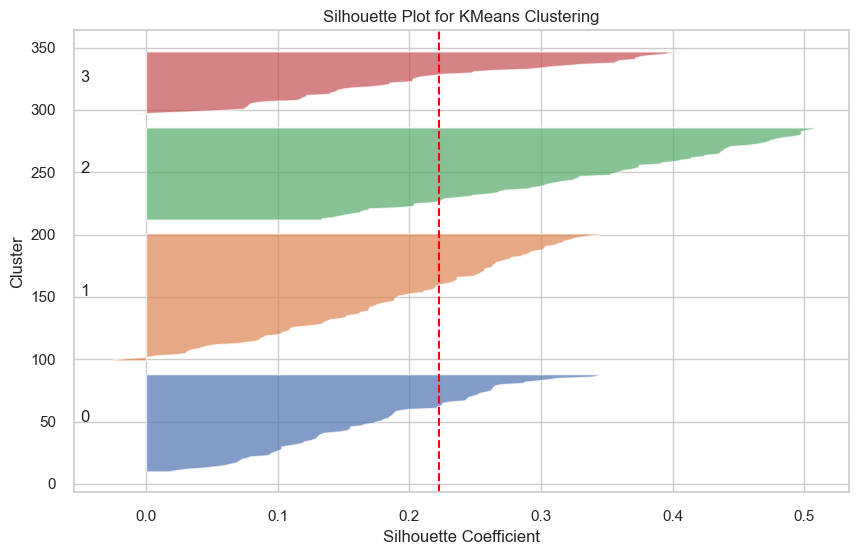

In [29]:
n_clusters = 4
y_lower = 10
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    ith_cluster_silhouette_values = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # 10 for spacing between clusters

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Silhouette Plot for KMeans Clustering")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.show()

#### **2.3.3. Hierarchical Clustering**

After performing k-means, we will also try hierarchical clustering to determine the optimal number of clusters.

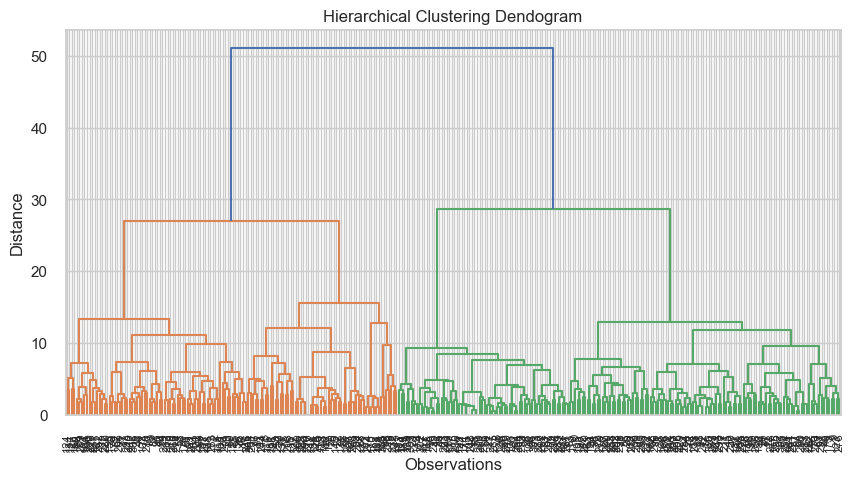

In [30]:
Z = linkage(segmentation_data, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.show()


Based on visual inspection, 4 clusters seem to be a suitable choice for cutting the dendrogram. To ensure the selection is optimal, we will calculate the silhouette scores for further validation.

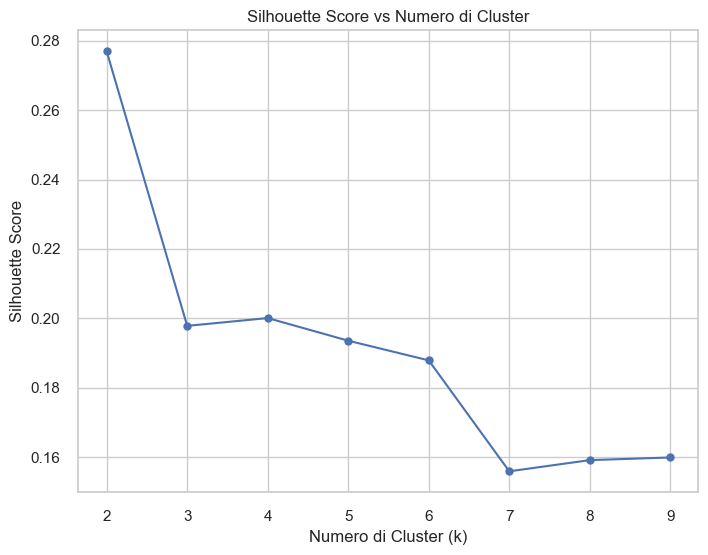

In [31]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster

silhouette_scores = []
cluster_range = range(2, 10)  # Da 2 a 10 cluster

for k in cluster_range:
    labels = fcluster(Z, k, criterion='maxclust')
    score = silhouette_score(segmentation_data, labels)
    silhouette_scores.append(score)

# Crea il grafico
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score vs Numero di Cluster')
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


Once again, the suggested number of clusters is 2, but we believe that 2 might be too few for our data. Therefore, 4 could still be the best solution in this case as well.

In [32]:
clusters = fcluster(Z, t=4, criterion='maxclust')

segmentation_data['Cluster_Hierarchical'] = clusters

segmentation_data

,freshness,origin,nutritional_balance,innovative_products,unprocessed,price,single_portion,sustainable_sources,sustainable_packaging,speed_n_simplicity,Cluster_KMeans,Cluster_Hierarchical
respondent_id,,,,,,,,,,,,
0,4,3,4,1,2,5,2,5,4,2.5,4,4
1,5,3,3,2,4,4,4,5,5,4.0,4,4
2,5,4,5,2,3,4,4,3,3,2.5,1,1
3,5,3,4,1,5,4,1,3,3,2.5,4,4
4,5,5,4,2,5,5,5,5,5,5.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
341,5,5,5,5,4,5,4,4,5,3.0,3,3
342,4,3,1,2,4,5,3,4,4,1.0,1,2
343,1,1,1,1,1,5,5,1,1,5.0,2,2



Let's proceed with the silhouette plot, as we did with the previous method, to evaluate the quality of the clustering and identify any potential misclassified units.


In [33]:
n_clusters = 4
cluster_labels = fcluster(Z, t=n_clusters, criterion='maxclust')

# Calcolo silhouette
silhouette_vals = silhouette_samples(segmentation_data, cluster_labels)
silhouette_avg = silhouette_score(segmentation_data, cluster_labels)

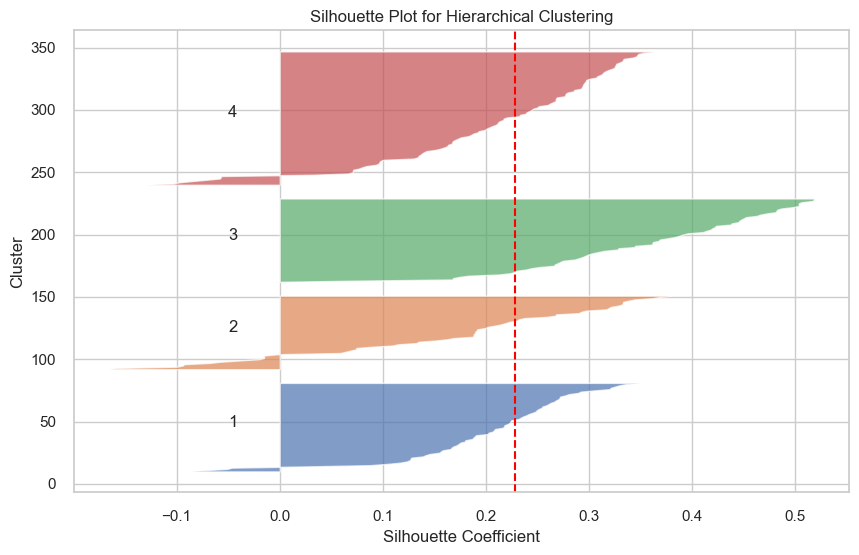

In [34]:
plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(1, n_clusters + 1):
    ith_cluster_silhouette_values = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # 10 for spacing between clusters

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Silhouette Plot for Hierarchical Clustering")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.show()

Hierchical methods shows some misclassified observations, we decided to use **K-Means** 

### **2.4. Clusters Analysis**

#### **2.4.1. Cluster's Preferences**

In [35]:
cluster_sizes = segmentation_data['Cluster_KMeans'].value_counts()
cluster_sizes

Cluster_KMeans
4    103
1     79
3     75
2     51
Name: count, dtype: int64


Cluster 4 has the largest number of samples (103), while Cluster 2 has the smallest (51). This suggests an imbalanced clustering, with Cluster 4 representing the most common pattern.

In [36]:
cluster_percentages = (cluster_sizes / cluster_sizes.sum()) * 100
cluster_percentages

Cluster_KMeans
4    33.441558
1    25.649351
3    24.350649
2    16.558442
Name: count, dtype: float64

In [37]:
numerical_data = segmentation_data.drop(columns=['Cluster_Hierarchical'])

centroids = numerical_data.groupby(segmentation_data['Cluster_KMeans']).mean()
print(centroids)

                freshness    origin  nutritional_balance  innovative_products  \
Cluster_KMeans                                                                  
1                4.126582  3.278481             3.518987             2.594937   
2                2.901961  2.431373             2.176471             1.686275   
3                4.760000  4.786667             4.666667             3.760000   
4                4.747573  4.388350             3.854369             2.203883   

                unprocessed     price  single_portion  sustainable_sources  \
Cluster_KMeans                                                               
1                  3.734177  4.177215        3.063291             3.164557   
2                  2.450980  2.823529        1.803922             2.509804   
3                  4.626667  4.666667        4.080000             4.586667   
4                  4.320388  3.650485        2.077670             4.417476   

                sustainable_packaging  speed

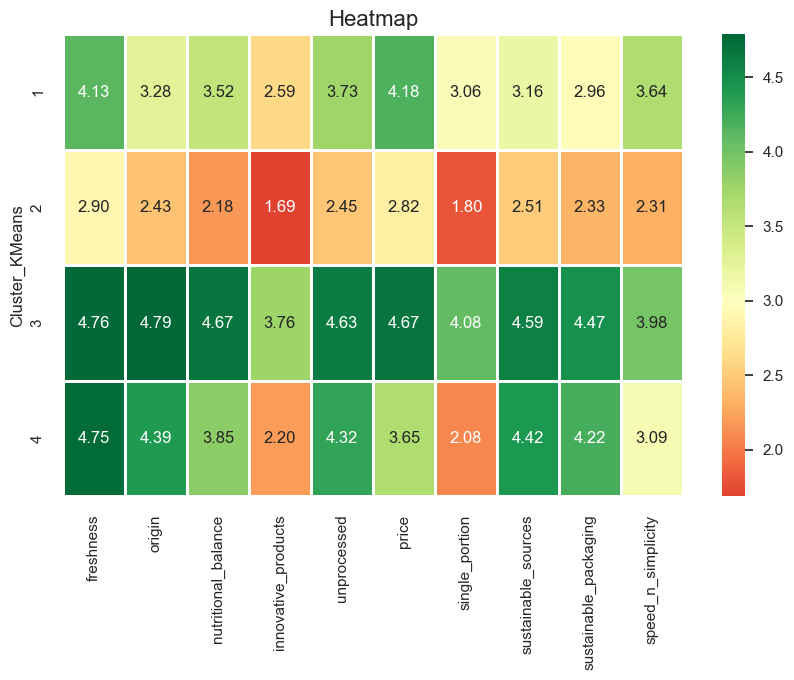

In [38]:
centroids_reset = centroids.drop(columns=['Cluster_KMeans'])

plt.figure(figsize=(10, 6))
sns.heatmap(centroids_reset, annot=True, cmap='RdYlGn', center=3, linewidths=1, fmt='.2f')
plt.title("Heatmap", fontsize=16)
plt.show()

- **Cluster 1:** This cluster values freshness and affordability, with moderate interest in sustainability and innovation. They are likely to prioritize quality and cost, but are somewhat open to sustainability if it aligns with their preferences.
- **Cluster 2:** Cluster 2 consists of individuals who are less concerned with innovation, sustainability, and freshness. They may prioritize more traditional options for fish, with less emphasis on environmental impact or product origin.
- **Cluster 3:** Cluster 3 values health, sustainability, and quality above all. These individuals are likely to prioritize fish that is fresh, nutritious, ethically sourced, and natural, even if it means paying a premium.
- **Cluster 4:** Cluster 4 values quality, sustainability, and natural products. They care about freshness and environmental impact, but are slightly less focused on convenience and portion sizes compared to the other clusters.

#### **2.4.2. Cluster's Characteristics**

Next, we **combine this information with descriptor data**.
The variables inlcuded are the following:
- **age**: the age range of the respondent.
- **region**: the region in Italy where the respondent lives.
- **location**: the type of area the respondent lives in, such as city centre or suburbs.
- **gender**: the gender with which the respondent identifies.
- **family_members**: the number of people in the respondent's household.
- **job**: the respondent's profession.
- **consumption_frequency**: how often the respondent consumes seafood.
- **fish_type**: the type of seafood consumed most frequently at home.
- **meal_preparation_time**: the average time spent preparing meals each day.
- **grocery_responsibility**: how often the respondent is responsible for grocery shopping.
- **grocery_place**: where the respondent most often purchases seafood.
- **WTP_fish**: the amount the respondent is willing to spend on a high-quality seafood product.

In [39]:
descriptor_data = data.iloc[:,1:16]
descriptor_data = descriptor_data.drop(descriptor_data.columns[[6,7,14]], axis=1)

# rename columns
new_names = { 'Qual è la tua età?': 'age', 
              'In che regione vivi?':'region', 
              'In che zona abiti?': 'location',
       'Con quale genere ti identifichi?' : 'gender',
       'Da quanti componenti è formato il tuo nucleo familiare?' : 'family_members',
       'Qual è la tua professione?': 'job',
        'Quanto spesso consumi prodotti ittici?': 'consumption_frequency',
       'Che tipo di prodotti ittici consumi più frequentemente in casa?': 'fish_type',
       'Quanto tempo dedichi mediamente alla preparazione dei pasti durante la giornata?' : 'meal_preparation_time',
       'Solitamente ti occupi tu della spesa nella tua famiglia?': 'grocery_responsibility',
       'Dove acquisti più spesso i tuoi prodotti ittici? (Puoi selezionare più opzioni) ': 'grocery_place',
       'Quanto saresti disposto a spendere per un prodotto ittico di alta qualità (es. burger di pesce gourmet)?': 'WTP_fish'
    
}

descriptor_data = descriptor_data.rename(columns=new_names)

Let's first examine the distribution of these variables across the entire dataset. This will allow us to analyze the sample and better understand the underlying patterns in the data.

C:\Users\melis\AppData\Local\Temp\ipykernel_15452\2667194974.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2')


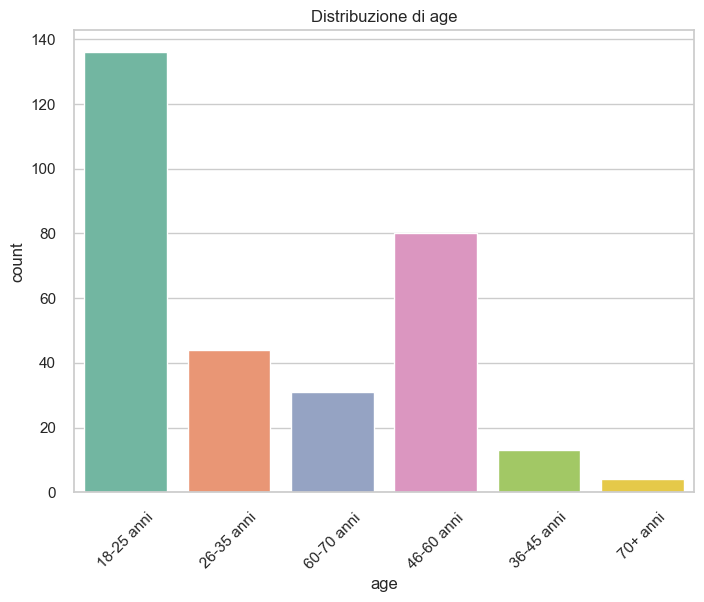

C:\Users\melis\AppData\Local\Temp\ipykernel_15452\2667194974.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2')


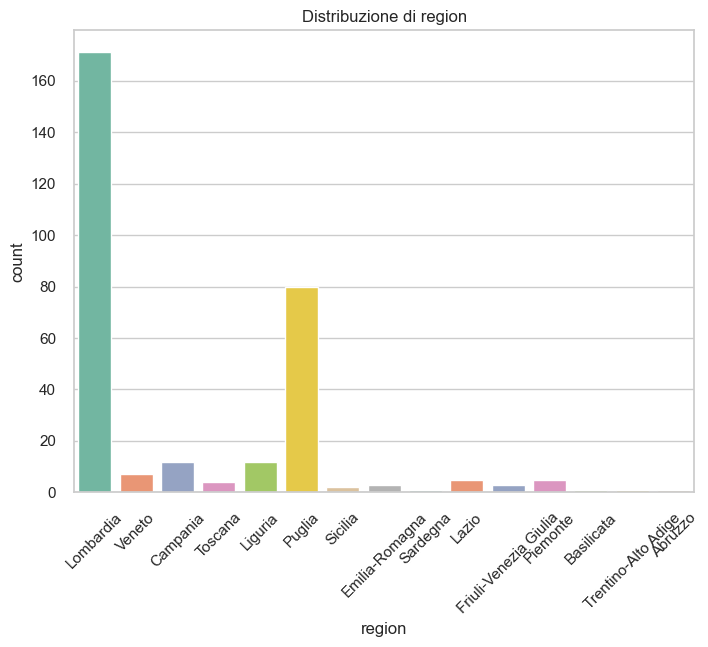

C:\Users\melis\AppData\Local\Temp\ipykernel_15452\2667194974.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2')


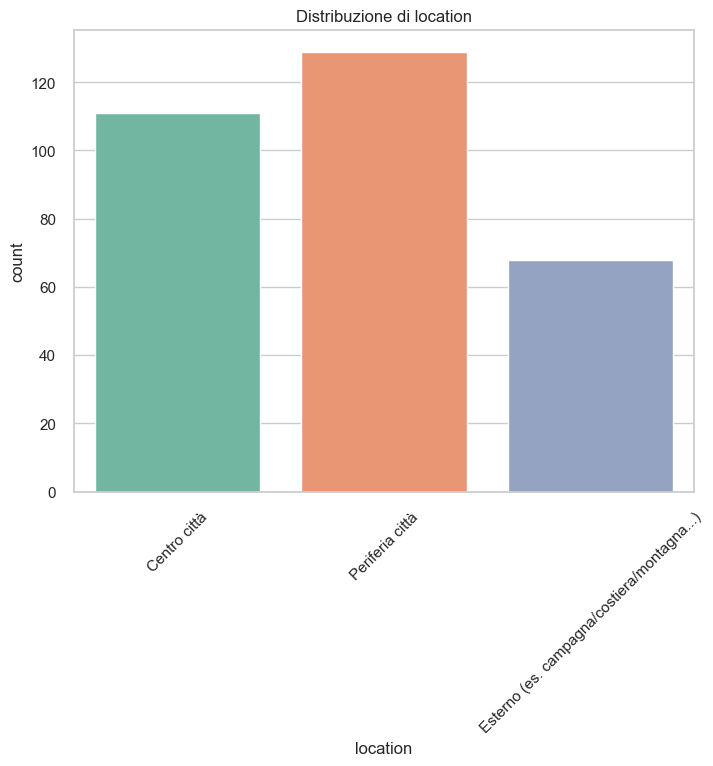

C:\Users\melis\AppData\Local\Temp\ipykernel_15452\2667194974.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2')


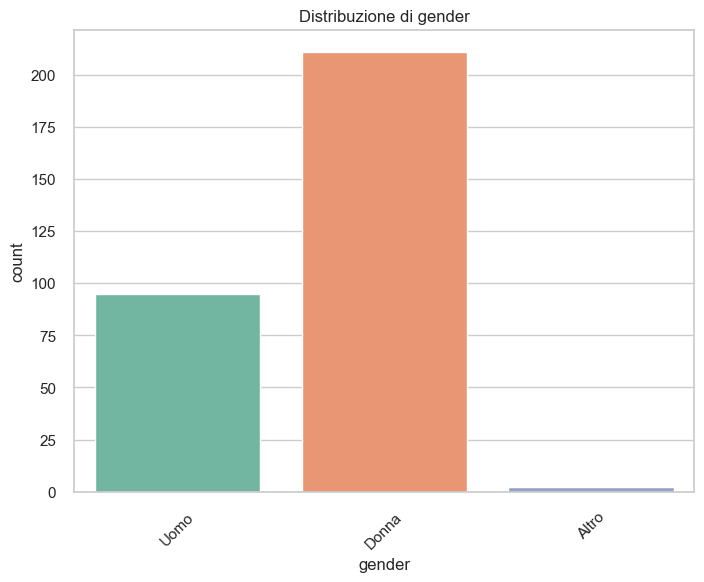

C:\Users\melis\AppData\Local\Temp\ipykernel_15452\2667194974.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2')


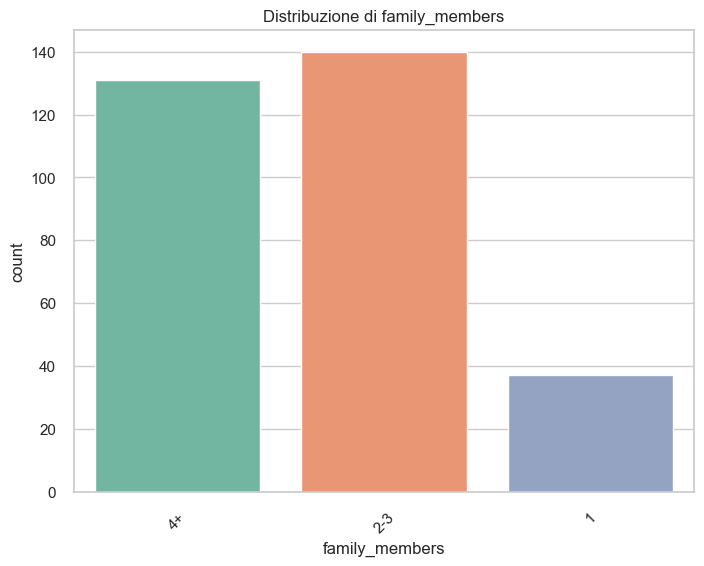

C:\Users\melis\AppData\Local\Temp\ipykernel_15452\2667194974.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2')


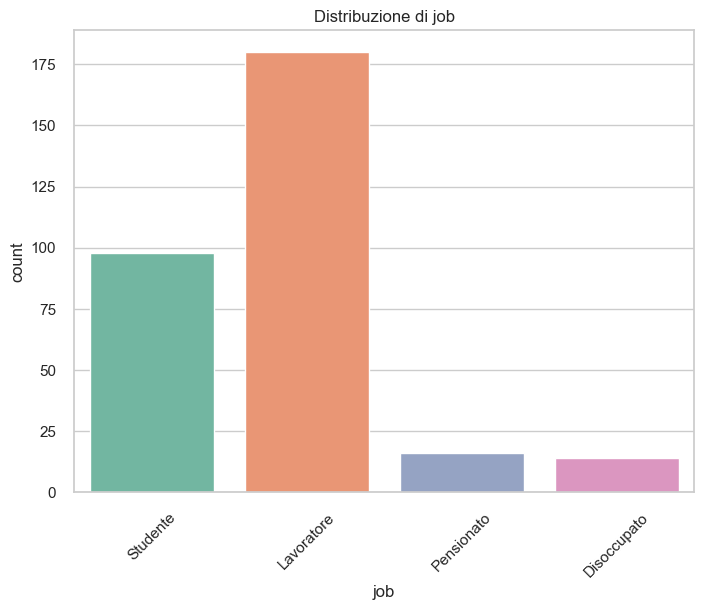

C:\Users\melis\AppData\Local\Temp\ipykernel_15452\2667194974.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2')


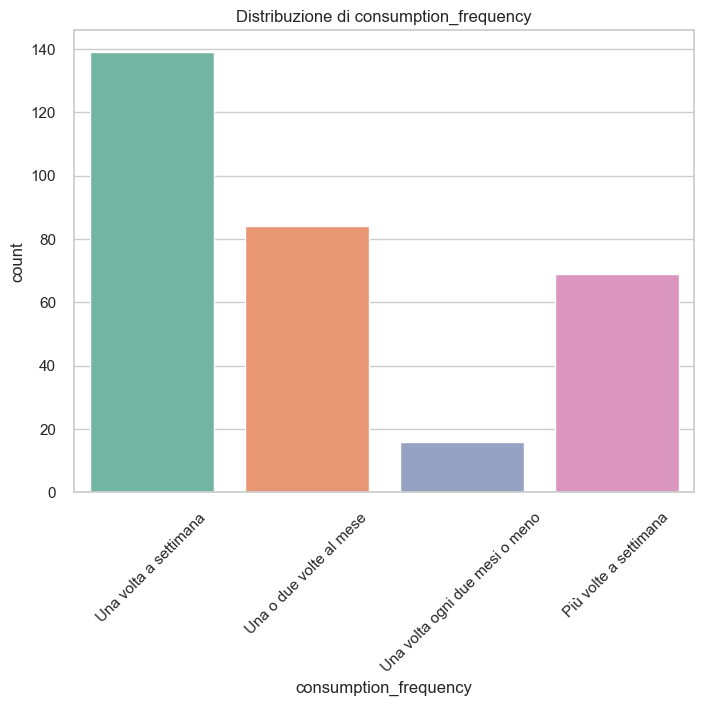

C:\Users\melis\AppData\Local\Temp\ipykernel_15452\2667194974.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2')


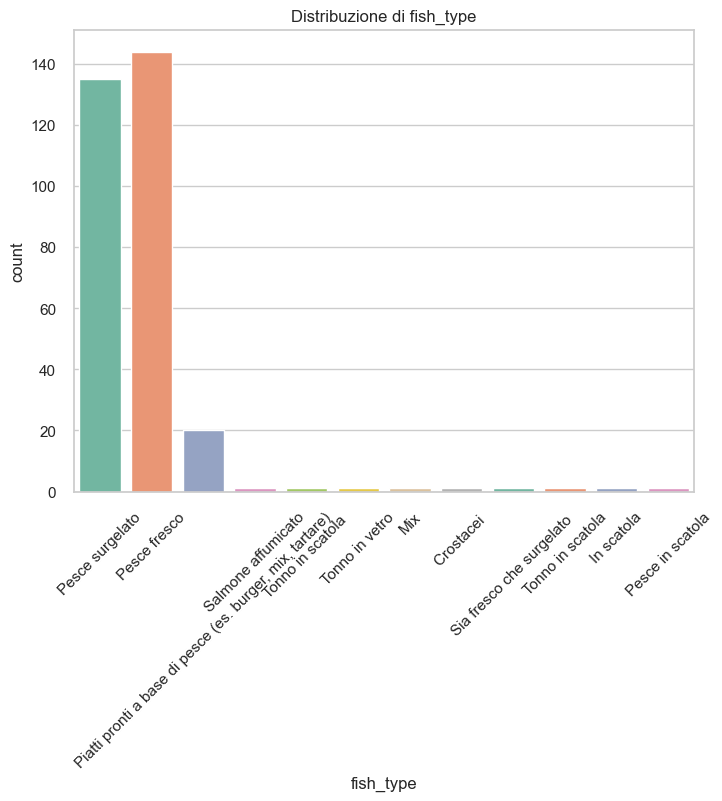

C:\Users\melis\AppData\Local\Temp\ipykernel_15452\2667194974.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2')


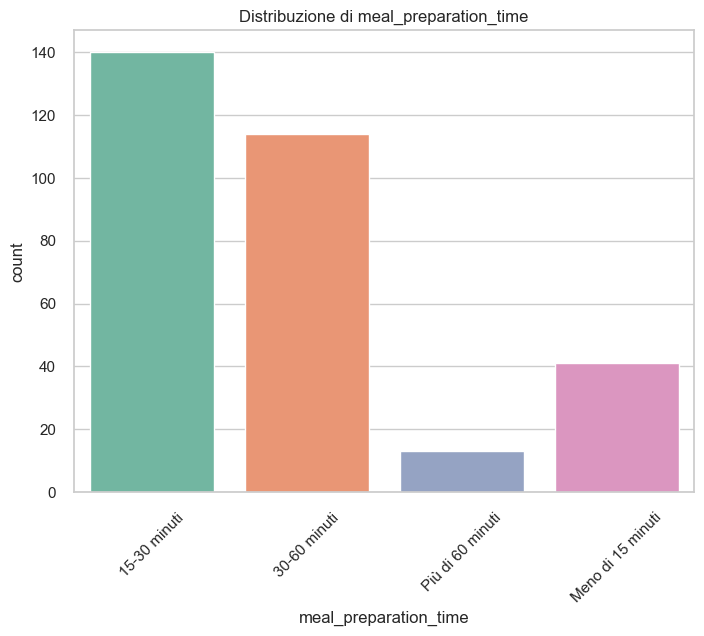

C:\Users\melis\AppData\Local\Temp\ipykernel_15452\2667194974.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2')


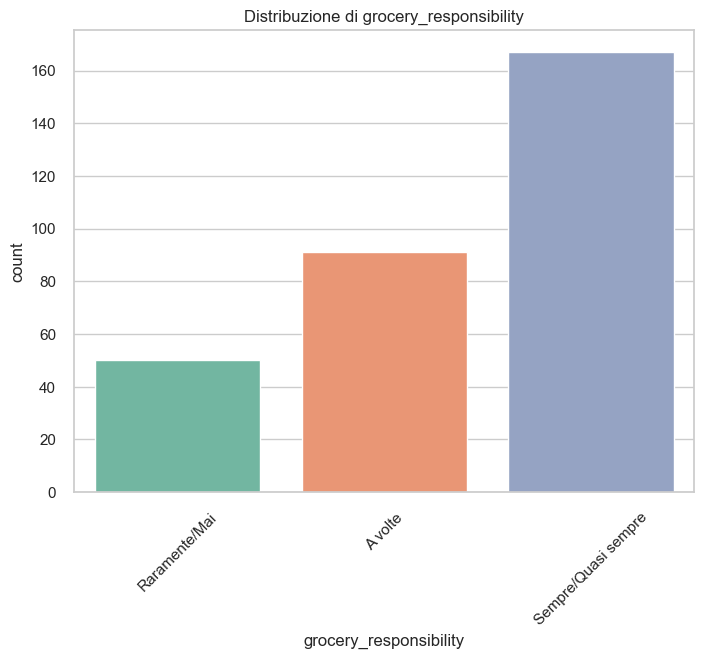

C:\Users\melis\AppData\Local\Temp\ipykernel_15452\2667194974.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2')


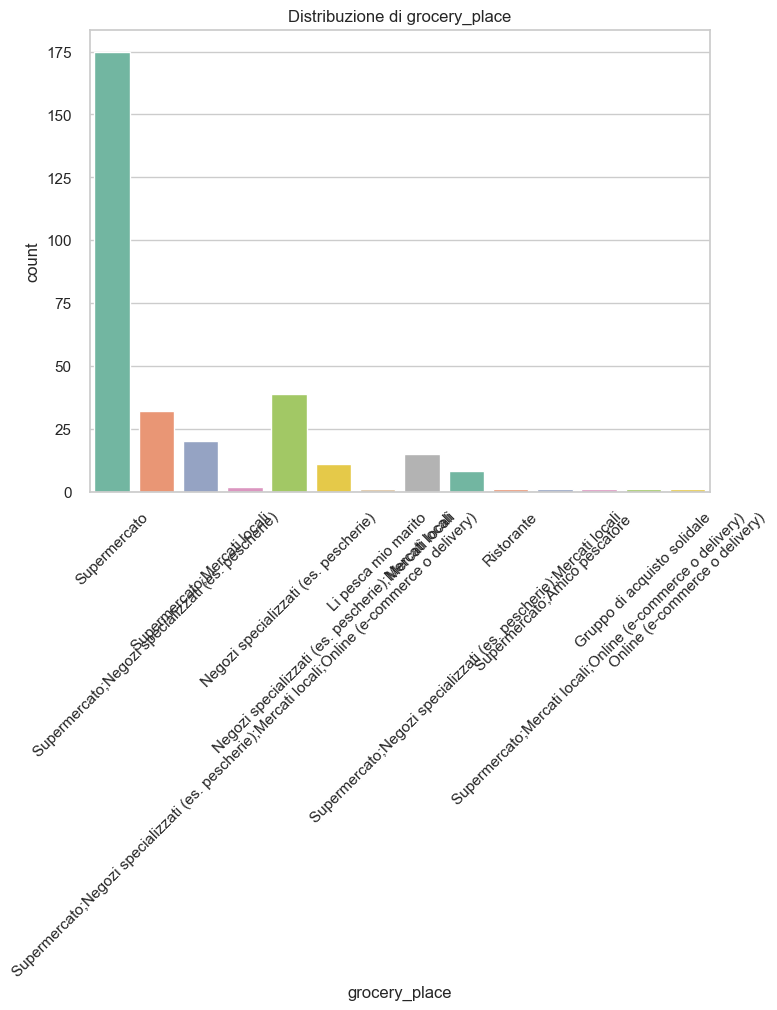

C:\Users\melis\AppData\Local\Temp\ipykernel_15452\2667194974.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2')
C:\Users\melis\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


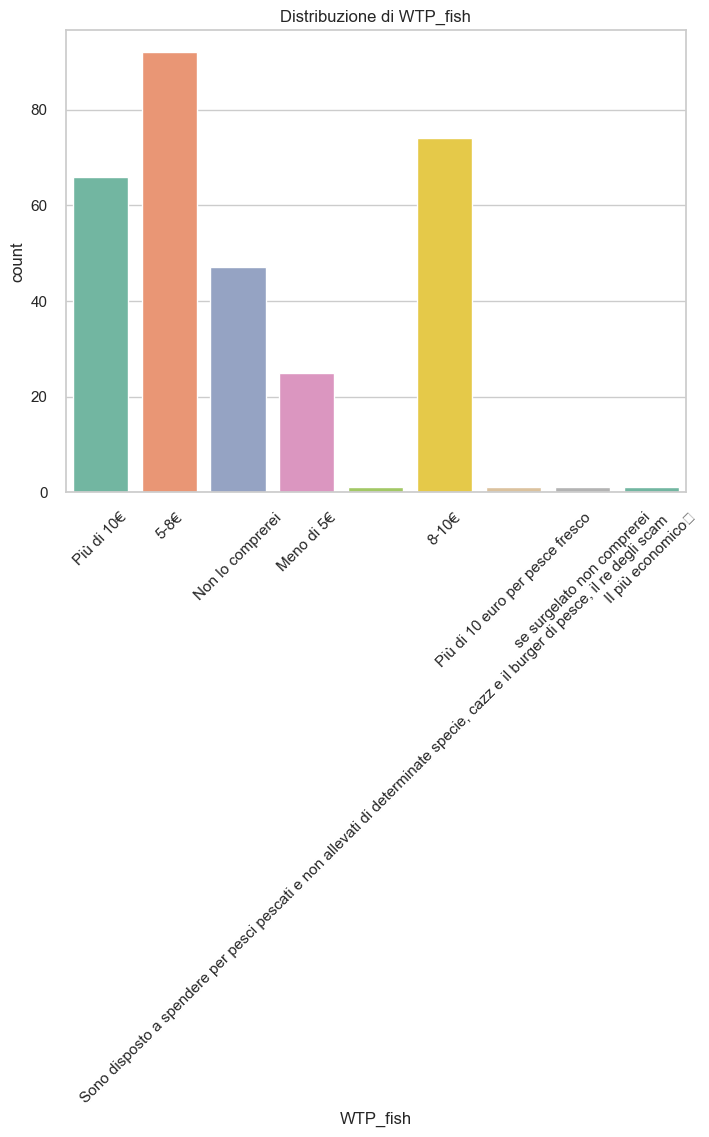

In [40]:
sns.set(style="whitegrid")

# Funzione per generare grafici a barre
def plot_bar(df, column):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column, palette='Set2')
    plt.title(f'Distribuzione di {column}')
    plt.xticks(rotation=45)
    plt.show()

# Lista di tutte le variabili (colonne) da analizzare
columns_to_plot = descriptor_data.columns

# Creazione dei grafici per tutte le variabili
for column in columns_to_plot:
    plot_bar(descriptor_data, column)

In [41]:
contingency_table = pd.crosstab(descriptor_data['age'], descriptor_data['gender'])

print("\nContingency Table: 'age' and 'gender':")
print(contingency_table)


Contingency Table: 'age' and 'gender':
gender      Altro  Donna  Uomo
age                           
18-25 anni      1     89    46
26-35 anni      1     23    20
36-45 anni      0     10     3
46-60 anni      0     61    19
60-70 anni      0     24     7
70+ anni        0      4     0


**Demographic Characteristics:**
- **age:** The majority of respondents are in the 18-25 years range, making up nearly half of the sample. The second-largest group is the 46-60 years range, followed by 26-35 years. The older age groups (60-70 years and 70+ years) represent a smaller proportion of the sample. This suggests that the sample may be skewed towards younger individuals.
- **region:** The distribution suggests a concentration of respondents in certain regions, particularly in Lombardia and Puglia. Several other regions like Campania, Liguria, and others represent a smaller proportion, and some regions are underrepresented with only a handful of respondents. This may impact the generalizability of the findings if the sample does not reflect the national distribution evenly.
- **location:** This suggests a relatively balanced distribution between urban (city center and suburbs) and more rural areas, although the suburban areas slightly dominate the sample. This could indicate that the survey captures a mix of urban and non-urban experiences but leans slightly towards suburban living.
- **gender:** This distribution indicates a strong skew towards female respondents.
- **family_members:** This suggests that most respondents come from medium to large households, with a relatively smaller group of single-person households.
- **job:** The survey primarily captures perspectives from the working and student populations, with a smaller representation from retirees and the unemployed. The distribution indicates a fairly typical demographic spread of working-age individuals and students, though the sample is more heavily skewed towards those in employment.

We can conclude that we do not have a perfectly representative sample of the entire population, but we do have votes for some categories, and if the limitations are properly taken into account, we could still conduct a good analysis.

**Habits:**
- **consumption_frequency:** Seafood is a relatively regular part of many respondents' diets, with a significant number of people consuming it weekly or more frequently. However, there is still a notable portion of the sample that consumes seafood infrequently.
- **fish_type:** This distribution indicates a strong preference for traditional forms of seafood, with fresh and frozen options being the most commonly consumed types.
- **meal_preparation:** Only a small portion spends more than an hour preparing meals, while the majority spends an average time of around 30 minutes.
- **grocery_responsibility:** More than half of the people take care of grocery shopping, and only a small portion never do, indicating that the data collected comes from individuals who actually purchase fish, meaning potential customers.
- **grocery_place:** The majority buy from supermarkets, while only a smaller portion purchase from specialized shops or local markets, making them not potential customers since our company sells frozen fish.
- **WTP_fish:** There is a fairly even distribution across all the proposed ranges.


After analyzing the variables, we will now examine the specific characteristics of each cluster to identify patterns and differences.

In [42]:
descriptor_data['Cluster'] = segmentation_data['Cluster_KMeans']

To gain some insights, we created **pie charts of the distribution of variables across each cluster**.

C:\Users\melis\AppData\Local\Temp\ipykernel_15452\2892629962.py:22: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  plt.tight_layout()
C:\Users\melis\AppData\Local\Temp\ipykernel_15452\2892629962.py:22: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
C:\Users\melis\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


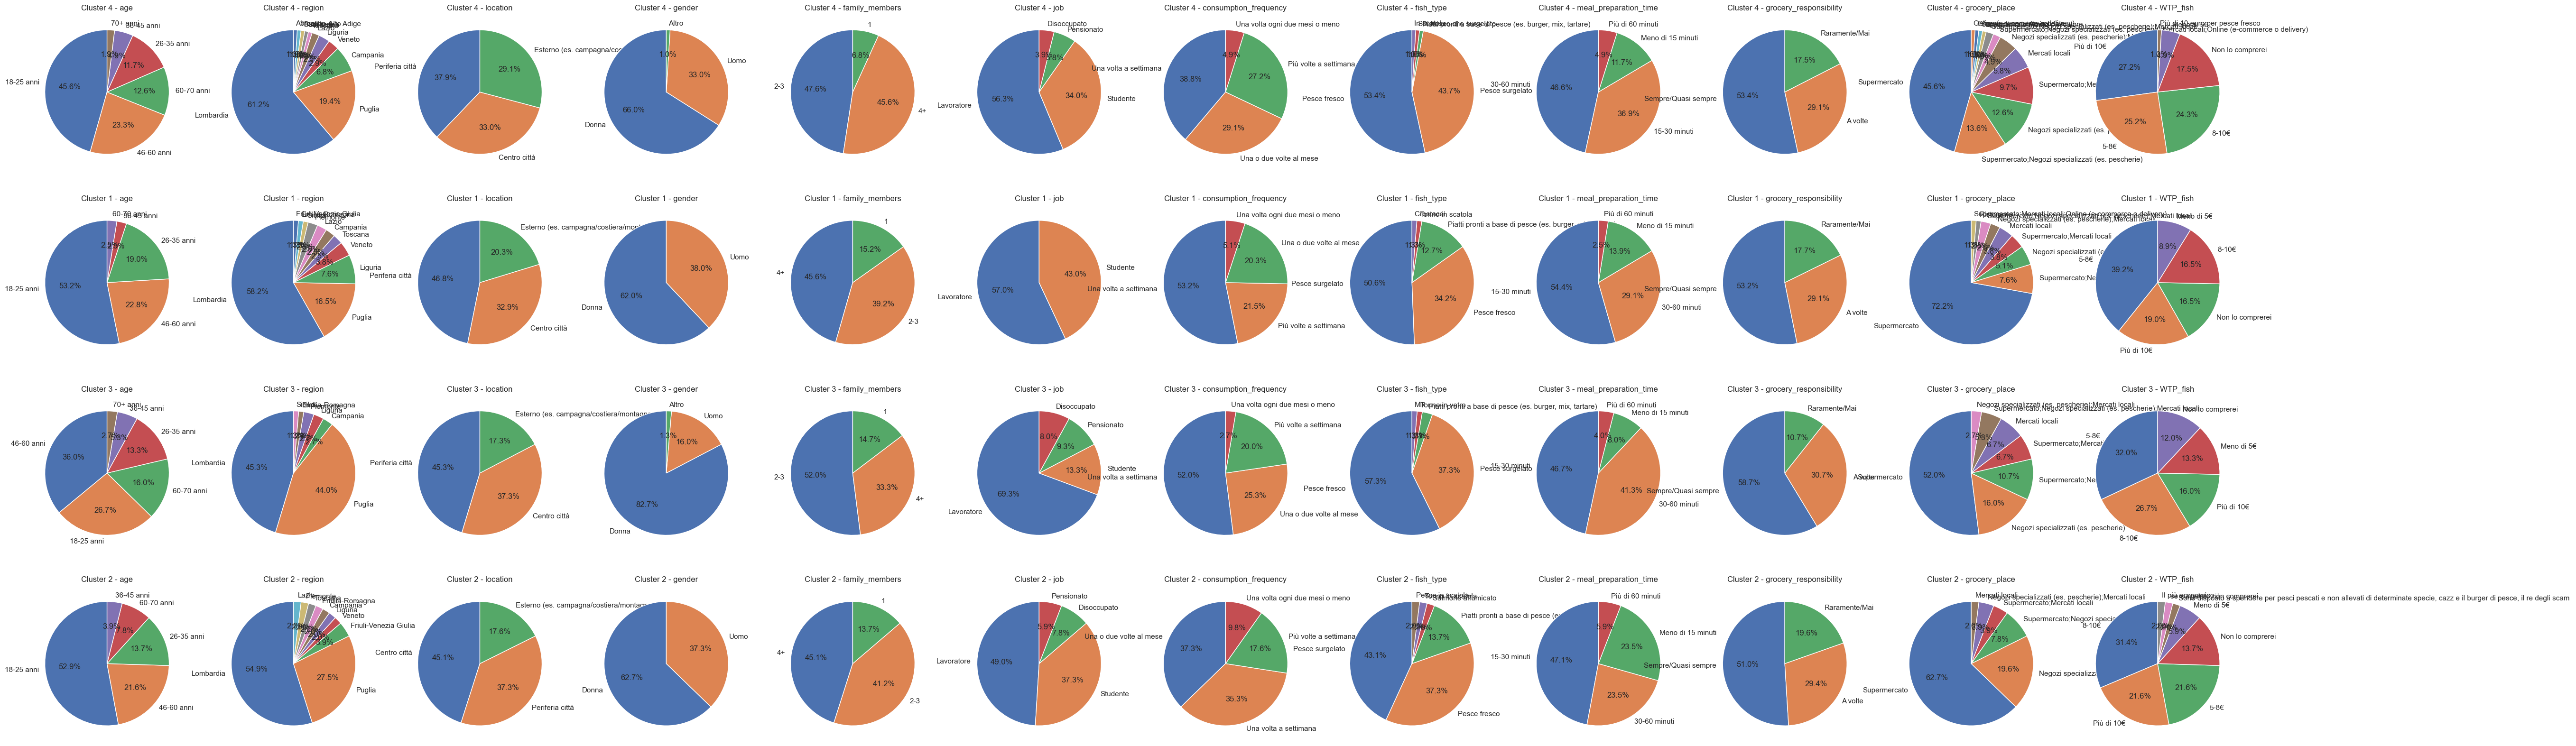

In [43]:
clusters = descriptor_data['Cluster'].unique()
variables = [col for col in descriptor_data.columns if col not in ['Cluster', 'respondent_id']]

num_clusters = len(clusters)
num_variables = len(variables)
fig, axs = plt.subplots(num_clusters, num_variables, figsize=(5 * num_variables, 5 * num_clusters))  # Adjust size as needed

if num_clusters == 1 or num_variables == 1:
    axs = np.array(axs).reshape(num_clusters, num_variables)

# Plot pie charts for each cluster and variable
for i, cluster in enumerate(clusters):
    cluster_data = descriptor_data[descriptor_data['Cluster'] == cluster]
    for j, var in enumerate(variables):
        # Get value counts for the variable in the current cluster
        counts = cluster_data[var].value_counts()
        # Create the pie chart
        ax = axs[i, j] if num_clusters > 1 else axs[j]
        ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        ax.set_title(f'Cluster {cluster} - {var}')

plt.tight_layout()
plt.show()

Let's analyze the clusters:
- **Cluster 1:** Predominantly students, preference for ready-made meals, mainly shop at supermarkets.
- **Cluster 2:** Lower percentage of workers, less frequent fish consumers, preference for ready-made meals, spend less time cooking.
- **Cluster 3:** Lowest percentage from Lombardia and highest from Puglia, lower percentage of students, fewer men, preference for fresh fish.
- **Cluster 4:** Predominantly students, more evenly distributed residential areas, fewer people living alone, spend 30–60 minutes cooking per meal.

Now, let's combine the demographic characteristics with the preferences previously defined to see if we can find any explanations:

- **Cluster 1:** This group places a lot of importance on price, with many students who mostly shop at supermarkets and prefer ready-made or frozen meals. However, this contrasts with their high interest in freshness, which doesn't align with the preference for ready-made meals and low prices. This could indicate a desire to eat fresh fish, but due to limited budgets, students tend to prioritize other, more affordable options in practice.
- **Cluster 2:** This group shows little importance for all categories, being uninterested in freshness, origin, or sustainability, and they consume the least amount of fish. A portion of this group prefers ready-made products and does not spend much time cooking.
- **Cluster 3:** They are the most demanding group, placing great importance on freshness, origin, and sustainability. A high percentage comes from Puglia, which may have greater access to fresh fish sources, and there is a low percentage of students and men.
- **Cluster 4:** They value quality but prefer traditional products. They don't prioritize single servings, as evidenced by the low percentage of people living alone. There is a predominance of students, but many may still live with their parents, which could explain the higher time dedicated to meals compared to other groups.

Dobbiamo adesso concludere con quali gruppi possono essere il nostro target, quanti sono sul totale della popolazione, etc...